
### Problem Statement
- **Elon Musk has started his own laptop company (Tesla Laptop) in India. He wants to give tough fights to big companies like Apple, Alienware, HP etc.**
- **He does not know how to estimate the price of laptops his company creates. In this competitive laptop market you cannot simply assume things.**
- **Musk wants to find out some relation between features of a Laptop(eg:- RAM, OS etc) and its selling price. But he is not so good at Data Mining.**
- **To solve this problem he already asked his Data Engineering team to collect laptop data from various competitors.**
- **Now he needs your (i.e Data Scientist’s) help to solve the following problem.**

#### Step- 1 (Data Analysis and Mining)
- Musk’s Requirements 
    1. Build an interface (using streamlit) for Elon Musk where he can enter the laptop features like RAM Size, RAM Type, HDD, OS, etc. and get the price prediction.
    2. Based on your Data Analysis and MIning skills, give recommendations to Elon Musk on how the pricing works in the laptop market.


#### Sprint - 2 (ML Model Tuning)
- Now he wants you to test the models you have created for Underfitting and Overfitting. He wants you to build a best fit model.
    1. First try to check if the models you have created are a best fit or not.
    2. See if applying cross validation helps improve your models performance.

### 1)Import Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import re

### 2)Load the dataset into a Pandas DataFrame using the read_csv() function.

In [11]:
import pandas as pd
url = 'https://drive.google.com/uc?id=1mJrzvzHBD7ocahDxDX-XrfaOT0YysW7S&export=download'
df = pd.read_csv(url)


### 3) Explore the dataset by checking the column names, data types, and statistical summary using the info(), dtypes, and describe() methods respectively.

In [12]:
df.head(5)

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [13]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB
None


In [14]:
print(df.dtypes)


Product     object
Rating     float64
MRP         object
Feature     object
dtype: object


In [15]:
print(df.describe())


           Rating
count  581.000000
mean     4.321170
std      0.282872
min      3.000000
25%      4.200000
50%      4.300000
75%      4.500000
max      5.000000


### 4)Clean the data by handling missing values, removing duplicates, and correcting the data types if necessary.

In [16]:
# Handle missing values
df.dropna(inplace=True)

In [21]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [20]:
df['MRP'] = df['MRP'].apply(lambda x : x.replace('₹', '').replace(',', '')).astype(int)
df['MRP']

0       36990
1       39990
2       32990
3       49990
4       49990
        ...  
703    157990
714     90000
715     23490
718    125990
719     50990
Name: MRP, Length: 339, dtype: int32

### 5)Visualize the data using various charts and graphs to get insights into trends and patterns in the data using libraries such as Matplotlib and Seaborn.

<Axes: xlabel='Rating', ylabel='Count'>

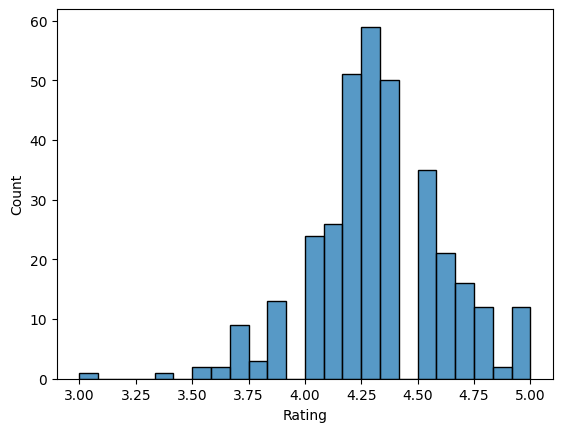

In [18]:
# Distribution plot of the Rating feature
sns.histplot(df['Rating'])


### 6)Extract Processor, RAM detail, Operating System, Storage, Brand from Features column

In [23]:
regex = r'^\w+'
df['Brand']=df['Product'].apply(lambda x : re.findall(regex, x))
df['Brand']= df['Brand'].apply(lambda x : ''.join(x))

In [24]:
regex= r'^(?:AMD|Intel|M1|Apple)[\s\w]+Processor'
df['Processor Type']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Processor Type']=df['Processor Type'].apply(lambda x : ''.join(x))
df['Processor Type']=df['Processor Type'].apply(lambda x: x.replace(" Processor", ""))

In [25]:
regex= r'[\d]+[\s]bit[\s\w]+Operating System|[\(Windows)\d\s]+Operating System|[\(Chrome|Mac OS)]+Operating System'
df['Operating System']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Operating System']=df['Operating System'].apply(lambda x : ''.join(x))
df['Operating System']=df['Operating System'].apply(lambda x: x.replace(" Operating System", ""))

In [26]:
regex = r'\d+\sGB[\s\w]+RAM'
df['RAM'] = df['Feature'].apply(lambda x : re.findall(regex, x))
df.RAM = df.RAM.apply(lambda x : ''.join(x))

In [27]:
regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'
df['Storage']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Storage']=df['Storage'].apply(lambda x : ''.join(x))

In [28]:
df.head(2)

,Product,Rating,MRP,Feature,Brand,Processor Type,Operating System,RAM,Storage
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,64 bit Windows 11,8 GB DDR4 RAM,256 GB SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,64 bit Windows 11,8 GB DDR4 RAM,512 GB SSD
